<a href="https://colab.research.google.com/github/AndAmir/Seefood-Model/blob/master/Seefood_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [ ]:
path = Path('/content/drive/My Drive/Seefood Dataset')
path.ls()
fnames = get_image_files(path)
fnames[:5]

[PosixPath('/content/drive/My Drive/Seefood Dataset/Hot Dog (31).jpg'),
 PosixPath('/content/drive/My Drive/Seefood Dataset/Hot Dog (30).jpg'),
 PosixPath('/content/drive/My Drive/Seefood Dataset/Hot Dog (28).jpg'),
 PosixPath('/content/drive/My Drive/Seefood Dataset/Hot Dog (27).jpg'),
 PosixPath('/content/drive/My Drive/Seefood Dataset/Hot Dog (29).jpg')]

In [ ]:
bs = 64
pat = r'\/([^\/]+) \('

In [ ]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=299, bs=bs).normalize(imagenet_stats)

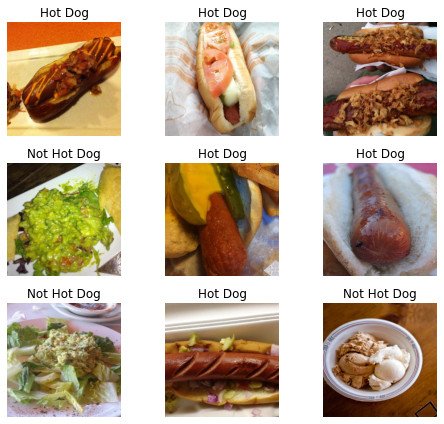

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.796881,0.626809,0.167539,0.832461,00:17
1,0.532251,0.383324,0.109948,0.890052,00:16
2,0.408952,0.365802,0.109948,0.890052,00:16


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

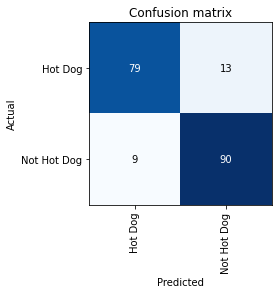

In [ ]:
interp.plot_confusion_matrix()

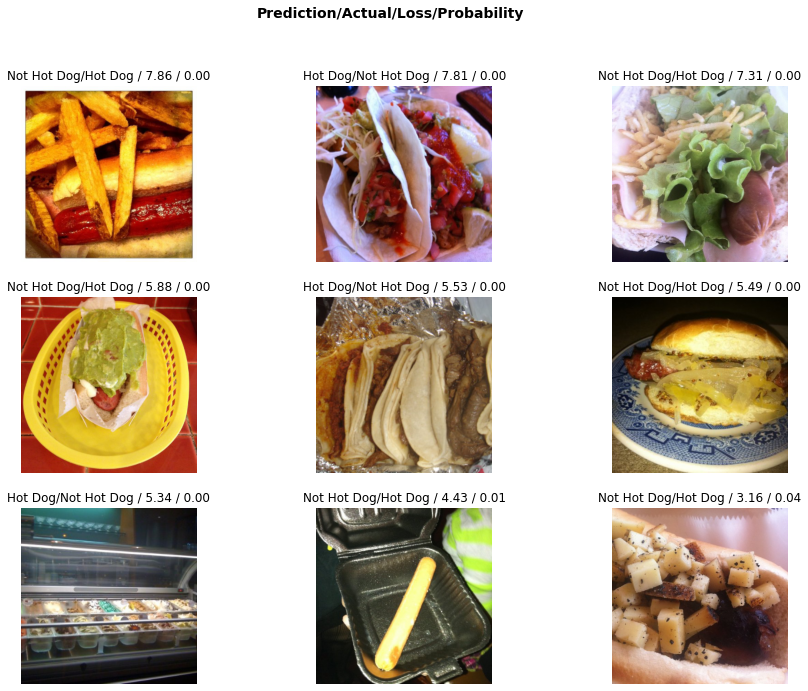

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


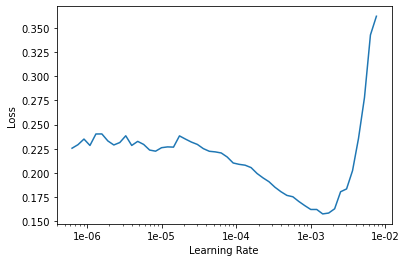

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.264628,0.376356,0.099476,0.900524,00:17
1,0.225814,0.369195,0.094241,0.905759,00:17


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

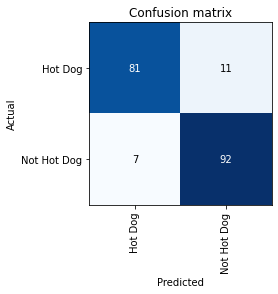

In [ ]:
interp.plot_confusion_matrix()

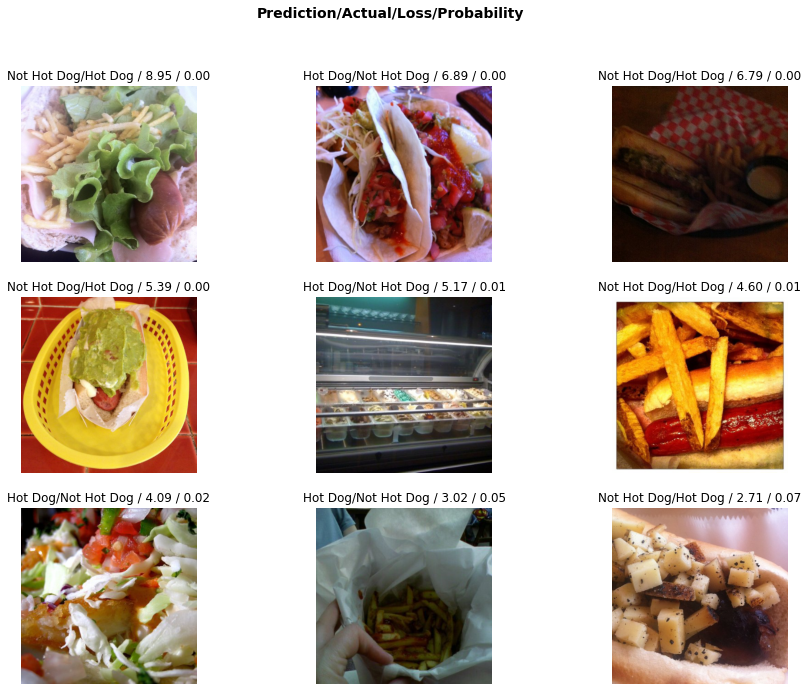

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
learn.export()